In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import re as re

train = pd.read_csv('Titanic/train.csv',header = 0, dtype={'Age':np.float64})
test = pd.read_csv('Titanic/test.csv',header = 0, dtype={'Age':np.float64})
full_data=[train , test]

print train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


In [3]:
print train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()  
#由于survived的只有0,1，所以对数据分类后，取均值一定程度上即反映出获救概率

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [4]:
print train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [5]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
print train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean()

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [6]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1 #替换数据列，重命名
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [7]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S') #将缺省值NaN化为‘S’
print (train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [8]:
for dataset in full_data:
    dataset['Fare']=dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print train['CategoricalFare']
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
5       (7.91, 14.454]
6      (31.0, 512.329]
7       (14.454, 31.0]
8       (7.91, 14.454]
9       (14.454, 31.0]
10      (14.454, 31.0]
11      (14.454, 31.0]
12      (7.91, 14.454]
13     (31.0, 512.329]
14      (-0.001, 7.91]
15      (14.454, 31.0]
16      (14.454, 31.0]
17      (7.91, 14.454]
18      (14.454, 31.0]
19      (-0.001, 7.91]
20      (14.454, 31.0]
21      (7.91, 14.454]
22      (7.91, 14.454]
23     (31.0, 512.329]
24      (14.454, 31.0]
25     (31.0, 512.329]
26      (-0.001, 7.91]
27     (31.0, 512.329]
28      (-0.001, 7.91]
29      (-0.001, 7.91]
            ...       
861     (7.91, 14.454]
862     (14.454, 31.0]
863    (31.0, 512.329]
864     (7.91, 14.454]
865     (7.91, 14.454]
866     (7.91, 14.454]
867    (31.0, 512.329]
868     (7.91, 14.454]
869     (7.91, 14.454]
870     (-0.001, 7.91]
871    (31.0, 512.329]
872     (-0.001, 7.91]
873     (7.

In [14]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg+age_std,size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list 
    dataset['Age'] = dataset['Age'].astype(int)
    #随机函数randint生成指定大小的age值并填补到数据集中
train['CategoricalAge'] = pd.cut(train['Age'],5)
print train['CategoricalAge']
print train[['CategoricalAge','Survived']].groupby(['CategoricalAge'], as_index=False).mean()

0       (16.0, 32.0]
1       (32.0, 48.0]
2       (16.0, 32.0]
3       (32.0, 48.0]
4       (32.0, 48.0]
5       (32.0, 48.0]
6       (48.0, 64.0]
7      (-0.08, 16.0]
8       (16.0, 32.0]
9      (-0.08, 16.0]
10     (-0.08, 16.0]
11      (48.0, 64.0]
12      (16.0, 32.0]
13      (32.0, 48.0]
14     (-0.08, 16.0]
15      (48.0, 64.0]
16     (-0.08, 16.0]
17      (32.0, 48.0]
18      (16.0, 32.0]
19      (32.0, 48.0]
20      (32.0, 48.0]
21      (32.0, 48.0]
22     (-0.08, 16.0]
23      (16.0, 32.0]
24     (-0.08, 16.0]
25      (32.0, 48.0]
26      (32.0, 48.0]
27      (16.0, 32.0]
28     (-0.08, 16.0]
29      (16.0, 32.0]
           ...      
861     (16.0, 32.0]
862     (32.0, 48.0]
863     (32.0, 48.0]
864     (16.0, 32.0]
865     (32.0, 48.0]
866     (16.0, 32.0]
867     (16.0, 32.0]
868     (32.0, 48.0]
869    (-0.08, 16.0]
870     (16.0, 32.0]
871     (32.0, 48.0]
872     (32.0, 48.0]
873     (32.0, 48.0]
874     (16.0, 32.0]
875    (-0.08, 16.0]
876     (16.0, 32.0]
877     (16.0

c:\python27\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    print dataset['Title']

print(pd.crosstab(train['Title'], train['Sex']))



0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object
0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7       

In [12]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [16]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train = train.values
print train
test  = test.values

   Survived  Pclass  Sex  Age  Fare  Embarked  IsAlone  Title
0         0       3    1    1     0         0        0    1.0
1         1       1    0    2     3         1        0    3.0
2         1       3    0    1     1         0        1    2.0
3         1       1    0    2     3         0        0    3.0
4         0       3    1    2     1         0        1    1.0
5         0       3    1    2     1         2        1    1.0
6         0       1    1    3     3         0        1    1.0
7         0       3    1    0     2         0        0    4.0
8         1       3    0    1     1         0        0    3.0
9         1       2    0    0     2         1        0    3.0
[[ 0.  3.  1. ...,  0.  0.  1.]
 [ 1.  1.  0. ...,  1.  0.  3.]
 [ 1.  3.  0. ...,  0.  1.  2.]
 ..., 
 [ 0.  3.  0. ...,  0.  0.  2.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 0.  3.  1. ...,  2.  1.  1.]]


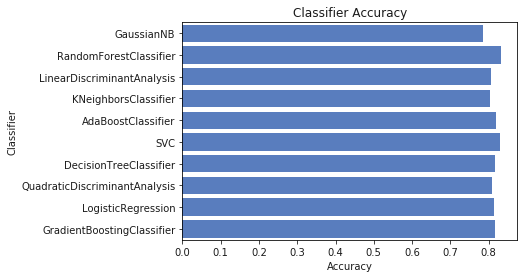

In [30]:
#Classifer comparison
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.show()

In [31]:
candidate_classifier = SVC()
candidate_classifier.fit(train[0::, 1::], train[0::, 0])
result = candidate_classifier.predict(test)
print result

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]
